In [ ]:
# Git clone to get the data
!git clone https://github.com/SergioDLezama/Retail-Analysis

In [2]:
#Importing necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Setting a style and number of Columns
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style("whitegrid")
sns.set_palette('Blues_r')

In [4]:
# Importing the data
df = pd.read_csv('/content/Retail-Analysis/retail_data.csv')

In [5]:
# I a m not running this because it displays personal info as email
#df.head(3)

In [6]:
# Shape of the data before transforming. 302,010 Rows and 30 Columns
df.shape

(302010, 30)

In [8]:
# Description of the columns, there is some missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [10]:
# Amount of missing data per column
df.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [11]:
# Dropping rows with missing data
df = df.dropna()

In [12]:
# Checking if there is still missing data
df.isnull().sum()

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64

In [20]:
# After dropping the missing and sensible data there is 293,911 rows and 24 columns
df.shape

(293911, 24)

In [13]:
# Dropping the columns that contain sensible data
cols_to_drop = ['Name', 'Email', 'Phone', 'Address', 'Zipcode','Time']
df = df.drop(cols_to_drop, axis=1)

In [14]:
# Quick view of the data
df.head(3)

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Dortmund,Berlin,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Nottingham,England,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Geelong,New South Wales,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment


In [18]:
# Statistical description of the numerical columns on the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_ID,293911.00,5493725.59,2596085.94,1000007.00,3245885.50,5495879.00,7738197.00,9999995.00
Customer_ID,293911.00,55013.40,26009.44,10000.00,32470.00,55027.00,77514.00,99999.00
Age,293911.00,35.47,15.02,18.00,22.00,32.00,46.00,70.00
Year,293911.00,2023.17,0.37,2023.00,2023.00,2023.00,2023.00,2024.00
Total_Purchases,293911.00,5.36,2.87,1.00,3.00,5.00,8.00,10.00
Amount,293911.00,255.15,141.39,10.00,132.84,255.46,377.64,500.00
Total_Amount,293911.00,1367.69,1128.90,10.00,438.85,1041.16,2028.95,4999.63
Ratings,293911.00,3.16,1.32,1.00,2.00,3.00,4.00,5.00


In [22]:
# There is 3 duplicated rows
df.duplicated().sum()

3

In [25]:
# Getting the indexes
dup = df.duplicated()
df[dup].index

Index([299759, 301362, 301486], dtype='int64')

In [27]:
# Dropping the duplicated
df = df.drop(df.index[dup])

In [28]:
df.duplicated().sum()

0

In [32]:
df.shape

(293908, 24)

In [31]:
# The transaction IDs are not unique which is a problem
df['Transaction_ID'].nunique()

287005

In [34]:
# There is multiple transactions with the same ID
df['Transaction_ID'].value_counts()

Transaction_ID
6145934.00    4
9918529.00    3
6592672.00    3
1858467.00    3
2452608.00    3
             ..
4487444.00    1
6826016.00    1
2050516.00    1
6943631.00    1
9099074.00    1
Name: count, Length: 287005, dtype: int64

In [35]:
'''
Clearly there is some transaction IDs duplicated, but i do not know which one is the real
 so i will drop all the transaction IDs that appear more than 1 time
'''
df[df['Transaction_ID']==6145934]

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
140676,6145934.00,76353.00,Hamilton,Ontario,Canada,26.00,Male,Medium,Regular,11/29/2023,2023.00,January,3.00,146.11,438.34,Electronics,Whirepool,Fridge,Good,Express,Credit Card,Delivered,3.00,French door refrigerator
194626,6145934.00,23433.00,Bochum,Berlin,Germany,22.00,Female,Low,Regular,3/24/2023,2023.00,March,1.00,180.74,180.74,Home Decor,Bed Bath & Beyond,Bedding,Bad,Same-Day,Credit Card,Delivered,1.00,Pillowcase set
300648,6145934.00,76353.00,Hamilton,Ontario,Canada,56.00,Male,Medium,Premium,11/29/2023,2023.00,November,3.00,146.11,438.34,Clothing,Zara,Dress,Good,Express,Cash,Pending,4.00,Casual dress
301371,6145934.00,23433.00,Bochum,Berlin,Germany,22.00,Female,Low,Regular,3/24/2023,2023.00,March,1.00,180.74,180.74,Home Decor,Bed Bath & Beyond,Bedding,Bad,Same-Day,Cash,Delivered,1.00,Throw pillow


In [36]:
# Dropping duplicated IDs
duplicate_transaction_ids = df['Transaction_ID'].value_counts()[lambda x: x > 1].index
duplicate_indexes = df[df['Transaction_ID'].isin(duplicate_transaction_ids)].index
df = df.drop(duplicate_indexes)

In [39]:
# All the transaction IDs are unique
df['Transaction_ID'].value_counts()

Transaction_ID
2174773.00    1
2416371.00    1
5736738.00    1
5060644.00    1
2195548.00    1
             ..
3897203.00    1
2970871.00    1
3374752.00    1
9948479.00    1
9099074.00    1
Name: count, Length: 280216, dtype: int64

In [40]:
# Resetting the Index
df = df.reset_index(drop=True)

In [51]:
# We are left with 280,216 rows and 24 columns
df.shape

(280216, 24)

In [43]:
# Getting the Categorical columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['City', 'State', 'Country', 'Gender', 'Income', 'Customer_Segment',
       'Date', 'Month', 'Product_Category', 'Product_Brand', 'Product_Type',
       'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status',
       'products'],
      dtype='object')

In [44]:
# Simple for cycle to see the values inside the categorical columns
for col in cat_cols:
  print('*'*25)
  print(df[col].value_counts(normalize=True))

*************************
City
Chicago         0.07
Portsmouth      0.07
San Francisco   0.04
Frankfurt       0.03
Boston          0.03
                ... 
Kansas City     0.00
Denver          0.00
Arlington       0.00
San Diego       0.00
Philadelphia    0.00
Name: proportion, Length: 130, dtype: float64
*************************
State
England           0.21
Berlin            0.17
New South Wales   0.15
Ontario           0.15
Connecticut       0.07
Maine             0.04
Georgia           0.03
Kansas            0.02
New Mexico        0.02
New York          0.00
Maryland          0.00
Pennsylvania      0.00
California        0.00
Texas             0.00
Ohio              0.00
Illinois          0.00
Nevada            0.00
South Carolina    0.00
Hawaii            0.00
Mississippi       0.00
Minnesota         0.00
Michigan          0.00
Iowa              0.00
Utah              0.00
New Jersey        0.00
Louisiana         0.00
West Virginia     0.00
Delaware          0.00
Wyoming         

#### Quick insights
- Most of the orders are from these cities:
  - Chicago
  - Portsmouth
  - San Francisco
- Most of the orders are from these states:
  - England
  - Berlin
  - New South Wales
- Most of the orders are from these countries:
  - USA
  - UK
  - Germany
- There is more orders from males (62%) than woman (38%)
- Most of the orders come from Medium Income, followed by Low, than High
- The months with most amount of orders are
  - April
  - January
  - August
- We only have 5 products category. The most amount of orders are in Electronics (24%)
- Most of the feedback is Excellent followed by good. So in general the clients have good experience

In [46]:
# I am going to replace Mitsubishi AC and BluesStar AC to just AC
df.Product_Type.value_counts()

Product_Type
Water                                 22749
Smartphone                            17048
Non-Fiction                           16816
Fiction                               16732
Juice                                 11359
Television                            11350
T-shirt                               11307
Decorations                           11292
Shoes                                 11223
Tablet                                11184
Soft Drink                            11164
Furniture                             11161
Fridge                                 7024
Mitsubishi 1.5 Ton 3 Star Split AC     6334
Thriller                               5818
Kitchen                                5773
Children's                             5703
Shirt                                  5700
Coffee                                 5691
Jeans                                  5675
Dress                                  5667
Chocolate                              5654
Shorts             

In [47]:
# Replacing
df['Product_Type'] = df['Product_Type'].replace({'Mitsubishi 1.5 Ton 3 Star Split AC':'AC','BlueStar AC':'AC'})

<Axes: xlabel='Total_Purchases', ylabel='count'>

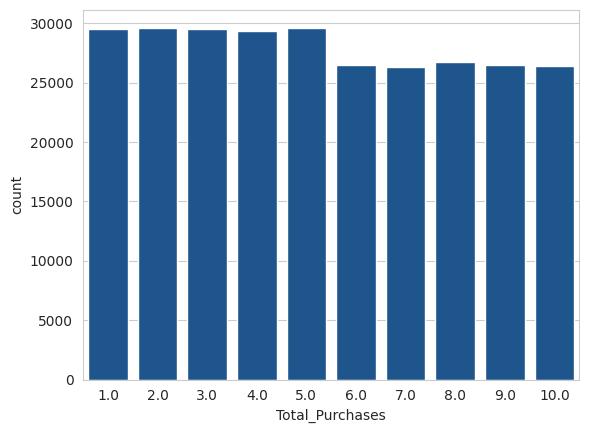

In [49]:
'''
Countplot Total Purchases
Wanted to see the distribution.
After 5 the amount of orders is a little lower
'''
sns.countplot(data= df, x='Total_Purchases')

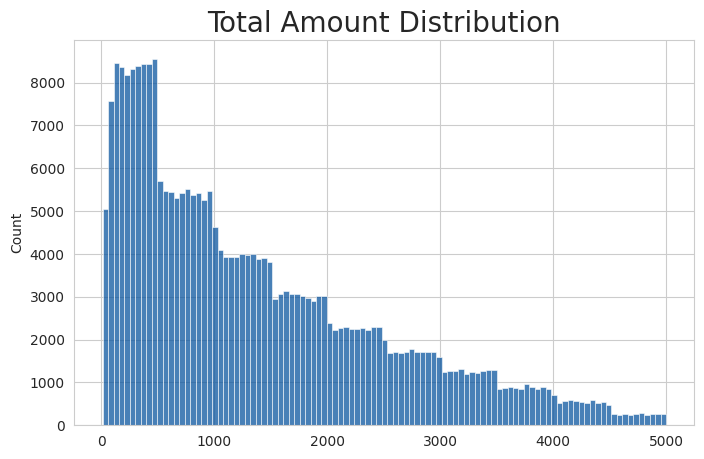

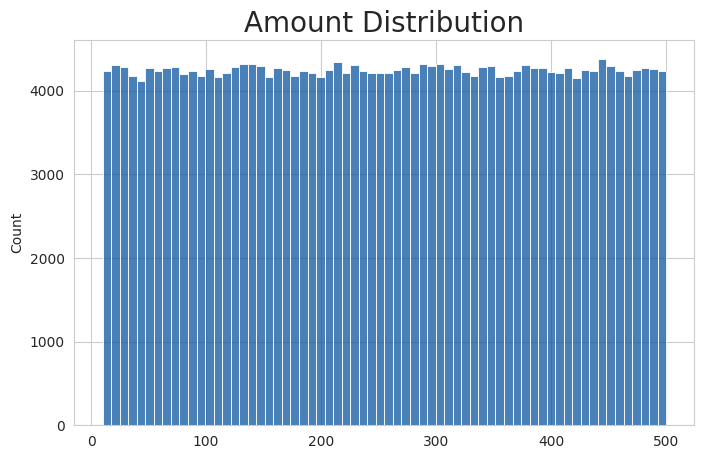

In [53]:
'''
Countplot Total Purchases & Amount

Total amount is right skewed
Most orders are lower than 1000

Amount has a uniform distribution
'''

to_hist = ['Total_Amount', 'Amount']
for col in to_hist:
  plt.figure(figsize=(8,5))
  sns.histplot(data=df, x=df[col])
  plt.title(f'{col.replace("_", " ")} Distribution', fontsize=20)
  plt.xlabel('')
  plt.show()

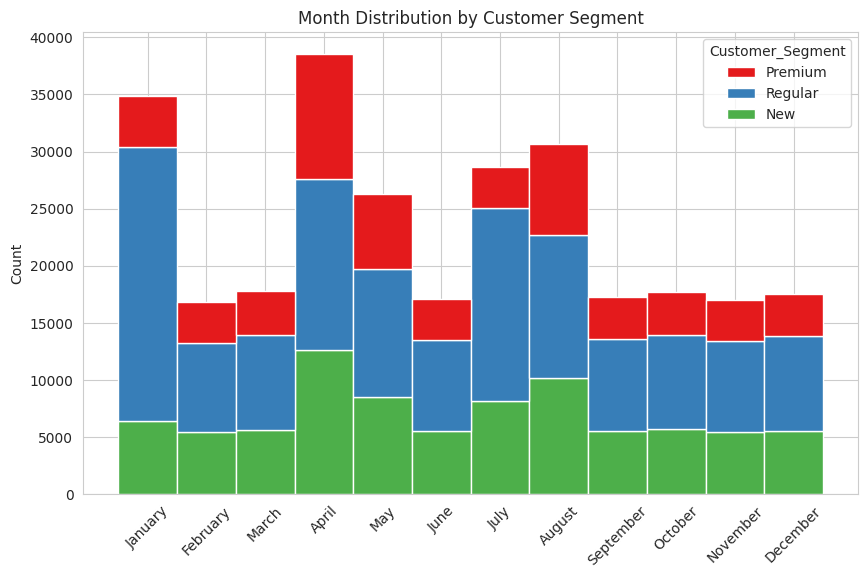

In [54]:
'''
Month Distribution by Customer Segment
Most orders are from January, April and August

In January most orders are from Regular customers
In April is when we got more orders from New Customers
'''

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Month',hue='Customer_Segment', palette='Set1',alpha=1,multiple='stack')

plt.xticks(rotation=45)
plt.title('Month Distribution by Customer Segment')
plt.xlabel('')
plt.show()

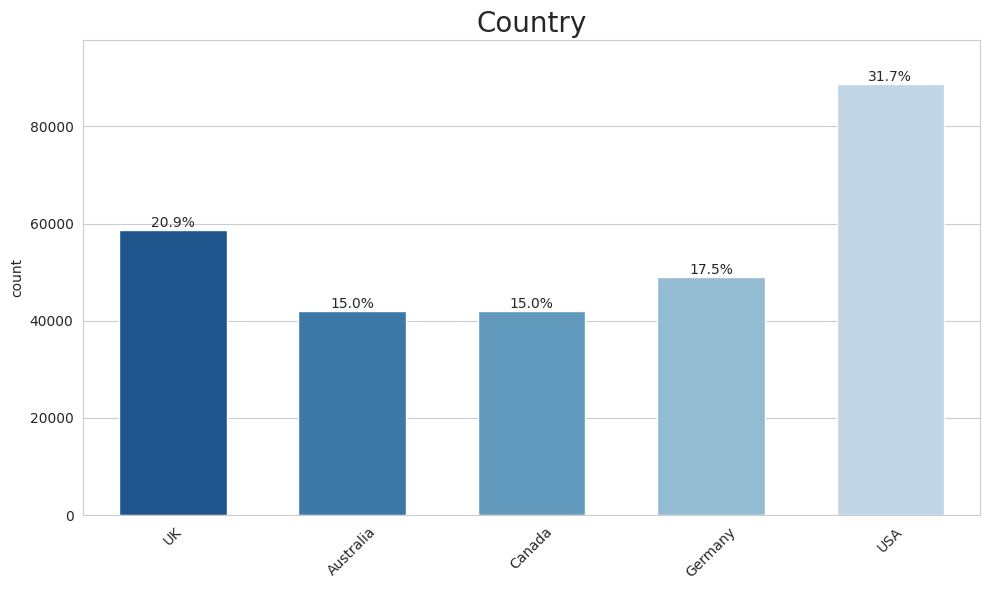

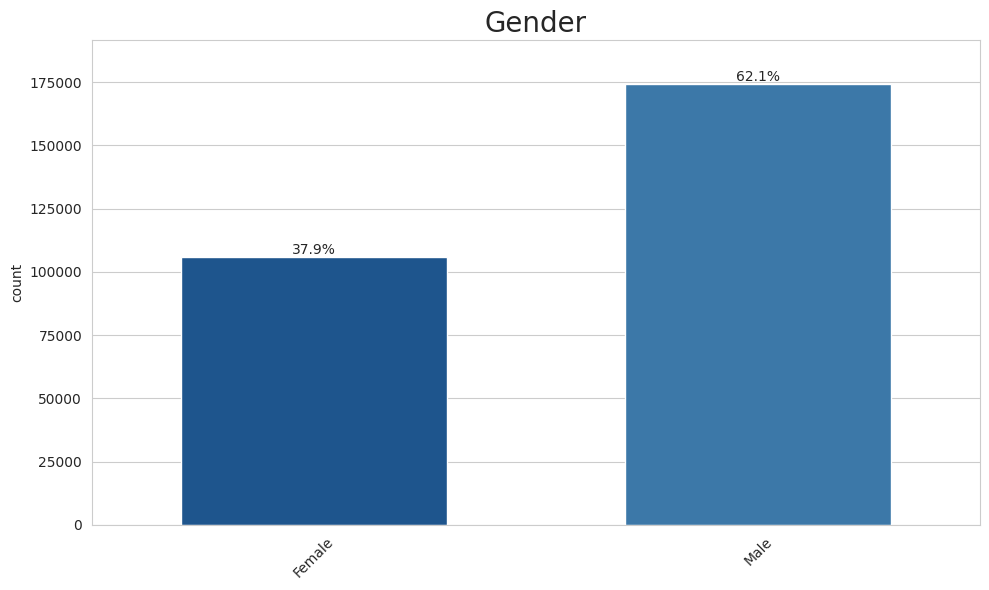

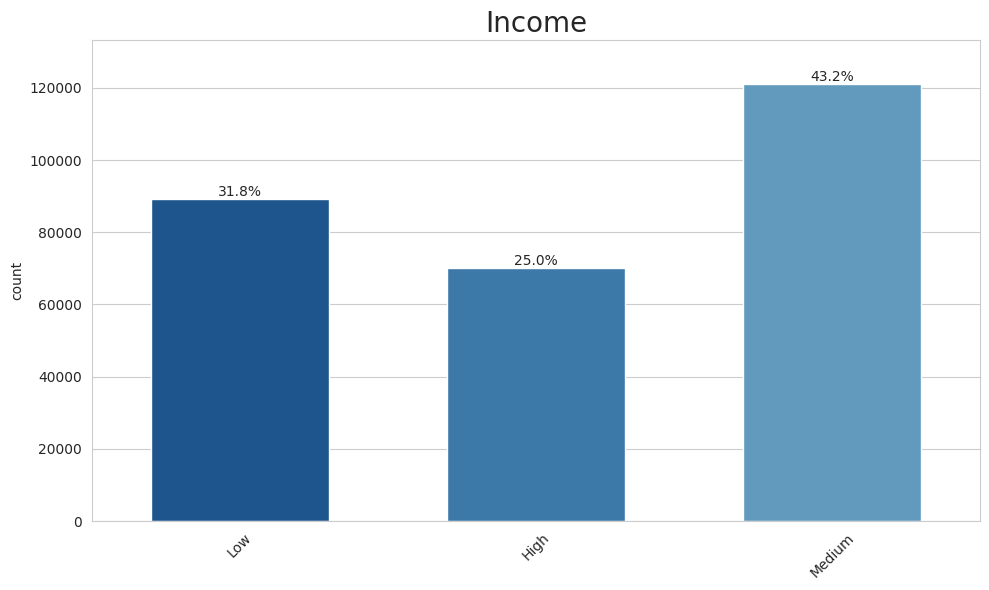

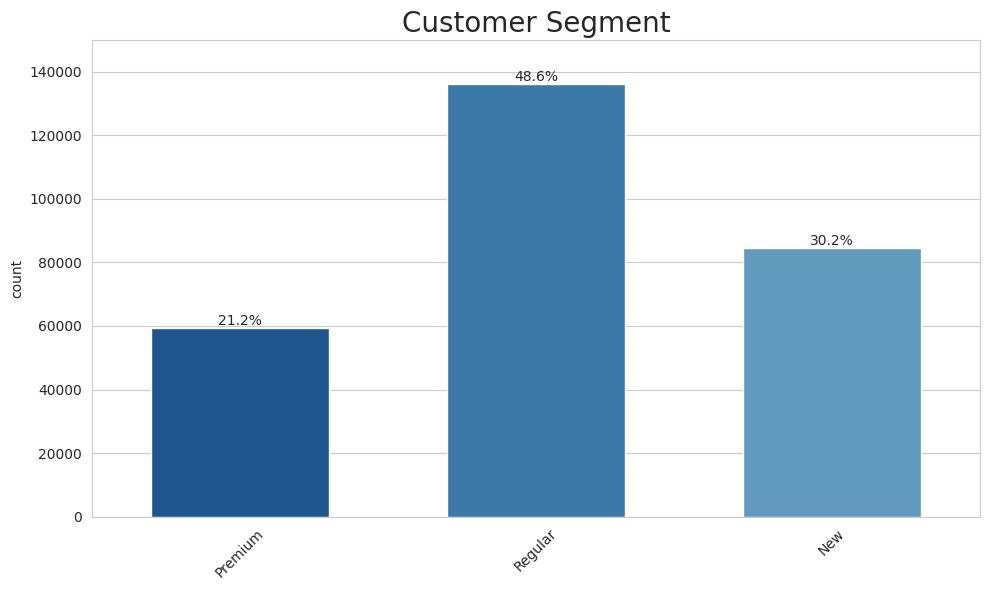

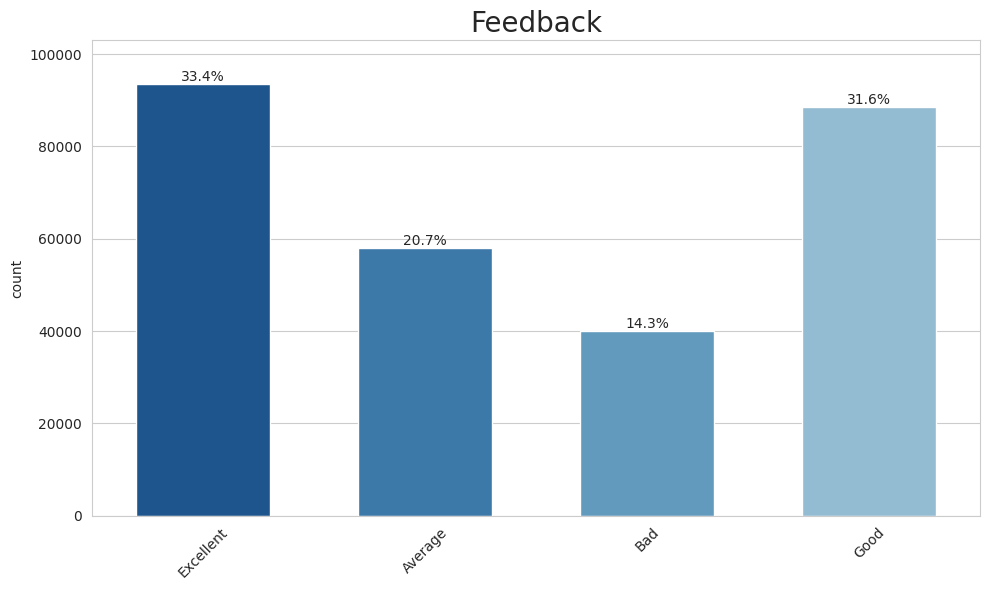

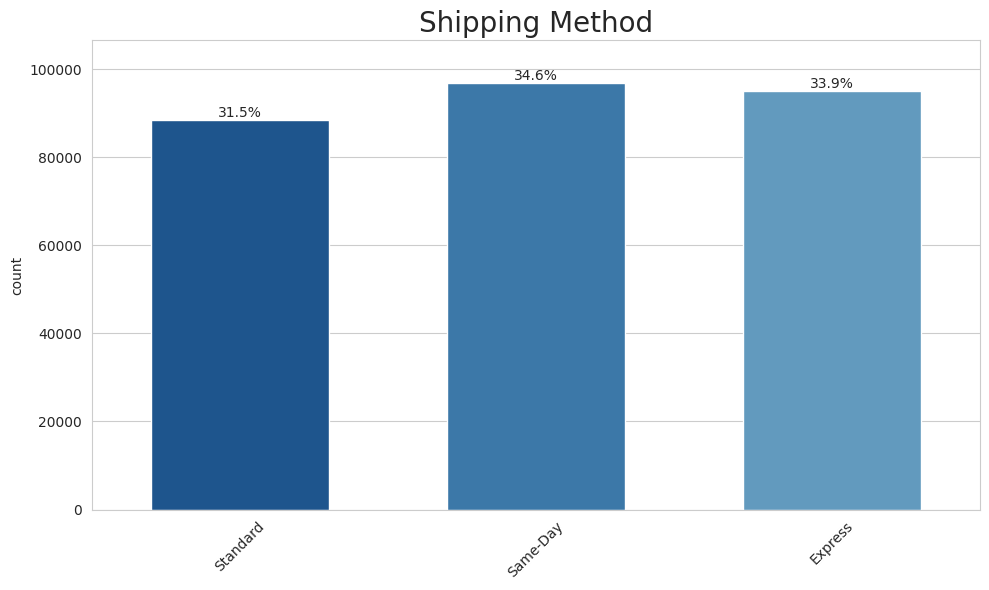

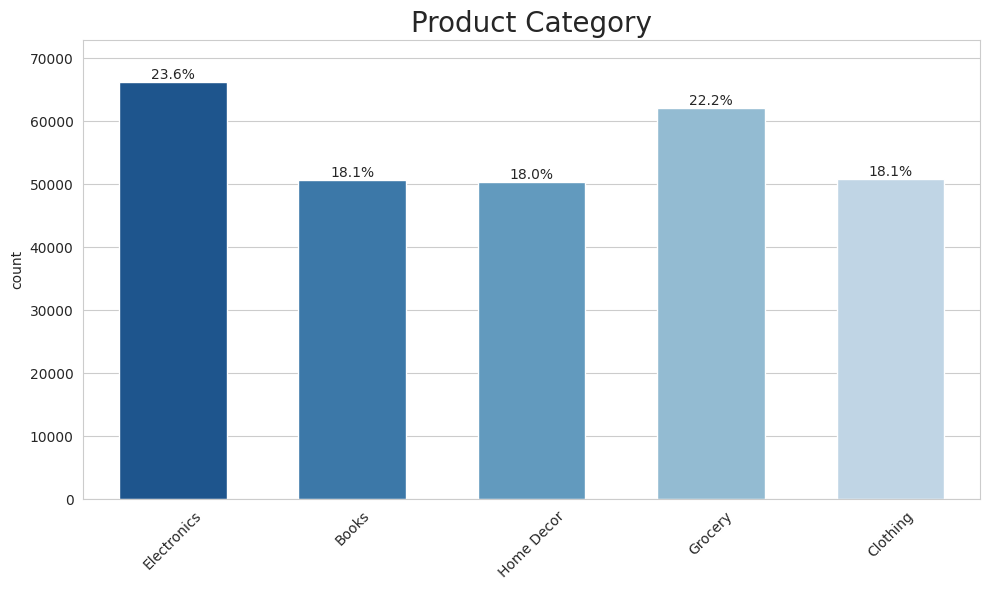

In [55]:
'''
Visual representation of the distribution of the categorical columns
'''


cat_cols = ['Country', 'Gender', 'Income', 'Customer_Segment','Feedback','Shipping_Method','Product_Category']
for col in cat_cols:
    plt.figure(figsize=(10,6))
    ax = sns.countplot(data=df, x=col, hue=col, width=0.6)
    plt.xticks(rotation=45)

    # Calculate percentages
    total = len(df[col])
    max_height = max([p.get_height() for p in ax.patches])
    ax.set_ylim(0, max_height * 1.1)  # Increase y-axis limit by 10%


    # Calculate percentages
    total = len(df[col])
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.title(f'{col.replace("_", " ")}',fontsize=20)
    plt.xlabel('')
    plt.tight_layout()
    plt.show()

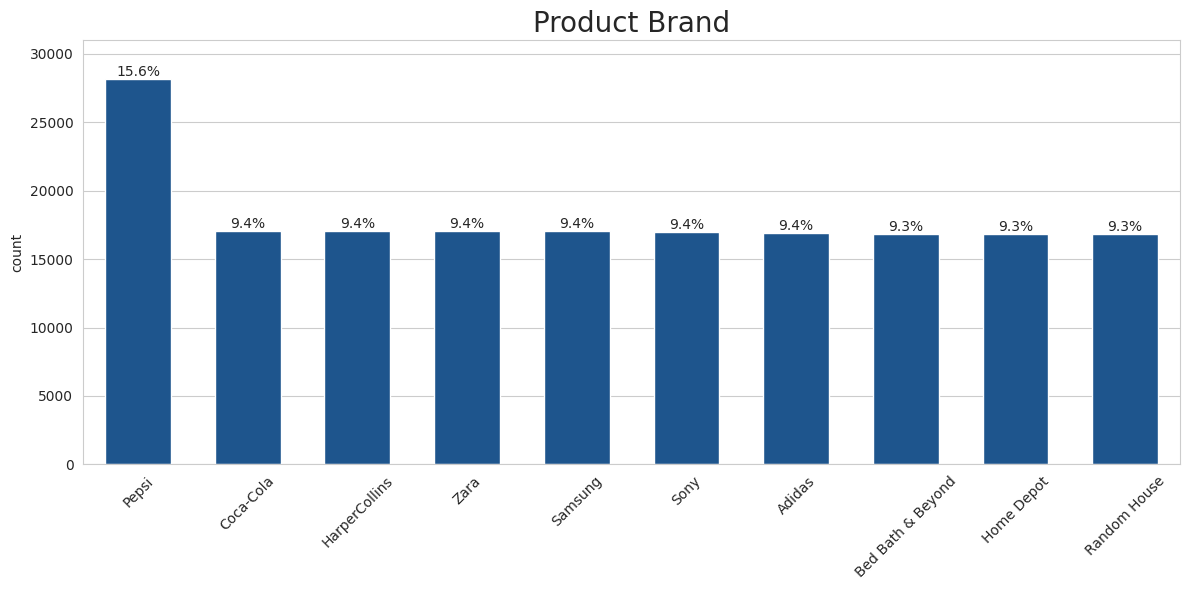

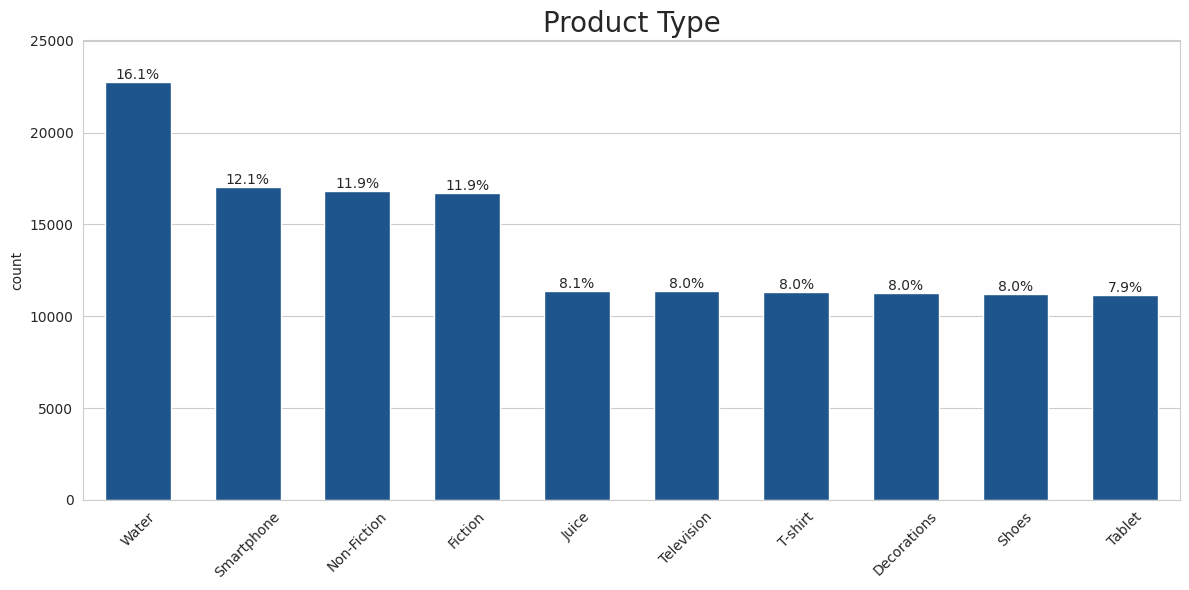

In [56]:
# Top 10 Product brand and types
cat_cols2 = ['Product_Brand','Product_Type']

for col in cat_cols2:
    # Get the top 10 most frequent values
    top_10_values = df[col].value_counts().nlargest(10).index
    top_10_df = df[df[col].isin(top_10_values)]

    plt.figure(figsize=(12,6))
    ax = sns.countplot(data=top_10_df, x=col, width=0.6, order=top_10_df[col].value_counts().index)
    plt.xticks(rotation=45)

    # Calculate percentages
    total = len(top_10_df[col])
    max_height = max([p.get_height() for p in ax.patches])
    ax.set_ylim(0, max_height * 1.1)  # Increase y-axis limit by 10%

    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')
    plt.title(f'{col.replace("_", " ")}',fontsize=20)
    plt.xlabel('')
    plt.tight_layout()
    plt.show()

In [60]:
# Wanted to check that most of the Pepsi products are water
df[df['Product_Brand']=='Pepsi'].head()

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
15,6681000.00,69939.00,Portsmouth,England,UK,69.00,Male,Low,Regular,07-01-23,2023.00,July,10.00,14.73,147.27,Grocery,Pepsi,Water,Average,Same-Day,Debit Card,Shipped,2.00,Flavored water
36,5992046.00,30637.00,Portsmouth,England,UK,34.00,Female,High,Regular,02-08-24,2024.00,February,7.00,44.33,310.31,Grocery,Pepsi,Soft Drink,Good,Express,PayPal,Processing,4.00,Iced tea
54,9658399.00,71121.00,Portsmouth,England,UK,54.00,Female,High,Regular,2/18/2024,2024.00,February,10.00,98.00,979.97,Grocery,Pepsi,Soft Drink,Bad,Same-Day,Cash,Shipped,1.00,Cream soda
71,7478681.00,73823.00,Portsmouth,England,UK,19.00,Female,Medium,Regular,11/23/2023,2023.00,November,1.00,249.61,249.61,Grocery,Pepsi,Juice,Excellent,Same-Day,Credit Card,Delivered,5.00,Cranberry juice
90,5166565.00,51279.00,Portsmouth,England,UK,60.00,Male,Low,Regular,12/21/2023,2023.00,December,4.00,183.71,734.83,Grocery,Pepsi,Water,Good,Same-Day,PayPal,Processing,3.00,Distilled water


In [64]:
# Function to plot the top 10 Product Brand and Type by Month
def brand_type_by_month(month):
  filtered_df = df[df['Month'].isin([month])]

  cols_to_see = ['Product_Brand','Product_Type']

  for col in cols_to_see:

      # Get the top 10 most frequent values from the filtered DataFrame
      top_10_values = filtered_df[col].value_counts().nlargest(10).index
      top_10_df = filtered_df[filtered_df[col].isin(top_10_values)]

      plt.figure(figsize=(12,6))
      ax = sns.countplot(data=top_10_df, x=col, width=0.6, order=top_10_df[col].value_counts().index)
      plt.xticks(rotation=45)

      # Calculate percentages
      total = len(top_10_df[col])
      max_height = max([p.get_height() for p in ax.patches])
      ax.set_ylim(0, max_height * 1.1)  # Increase y-axis limit by 10%

      for p in ax.patches:
          percentage = f'{100 * p.get_height() / total:.1f}%'
          x = p.get_x() + p.get_width() / 2
          y = p.get_height()
          ax.annotate(percentage, (x, y), ha='center', va='bottom')

      plt.title(f'{col.replace("_", " ")} Distribution in {month}',fontsize= 20)
      plt.xlabel('')
      plt.tight_layout()
      plt.show()

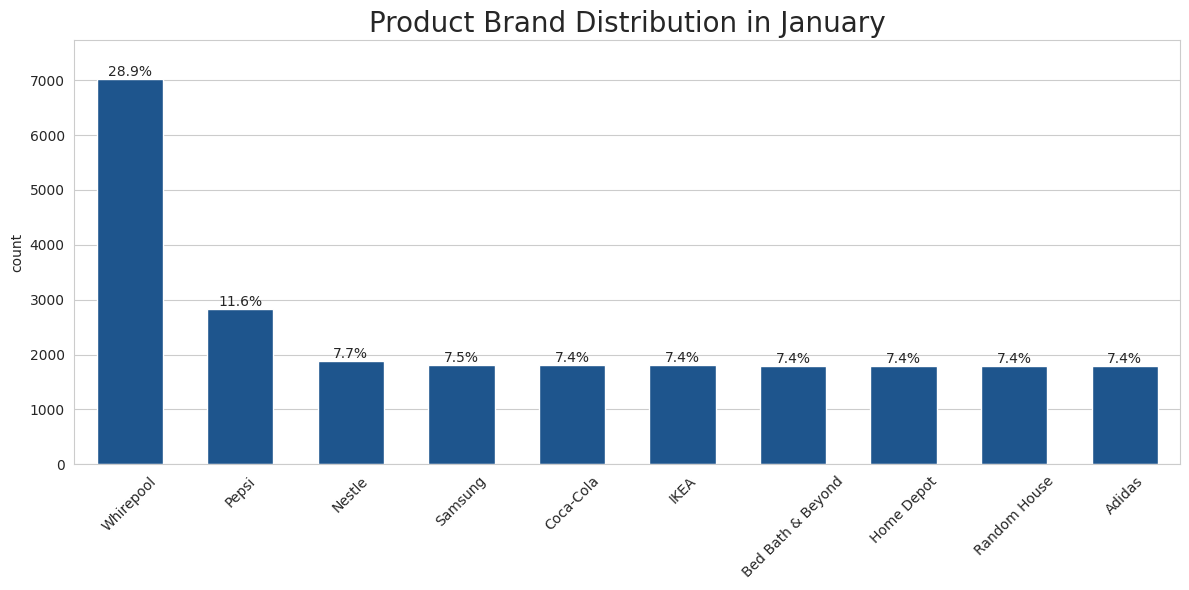

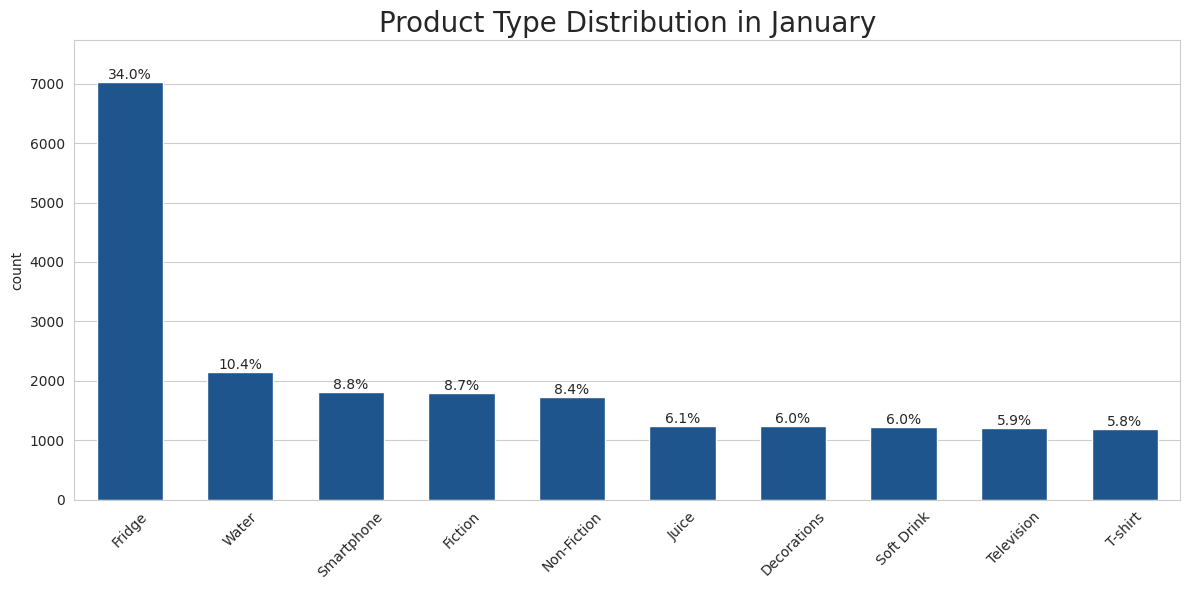

In [65]:
brand_type_by_month('January')

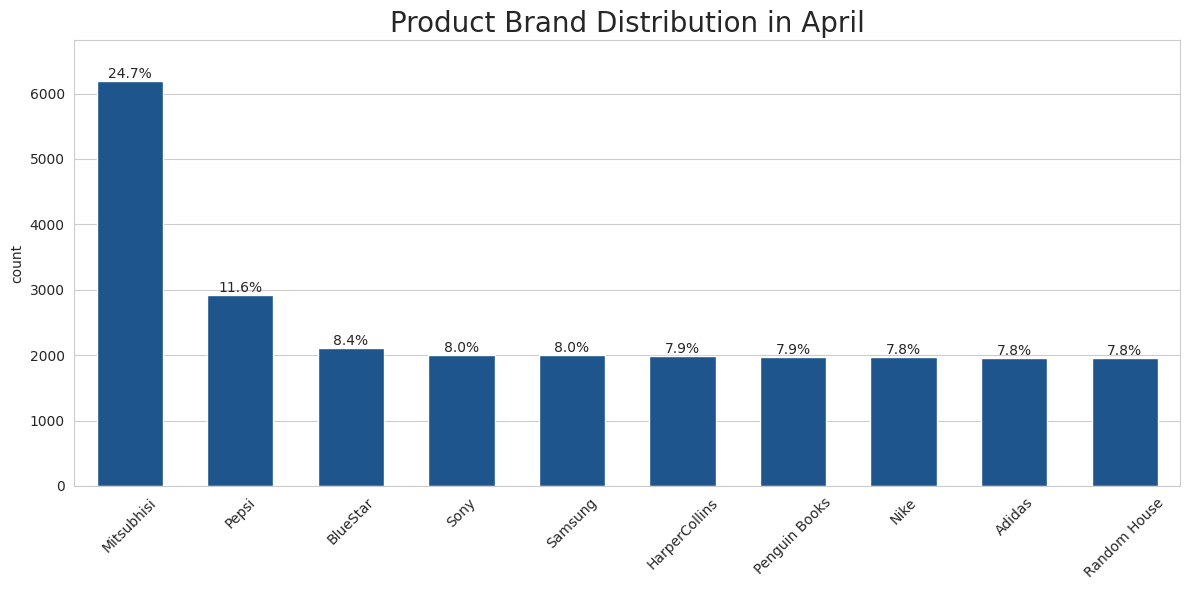

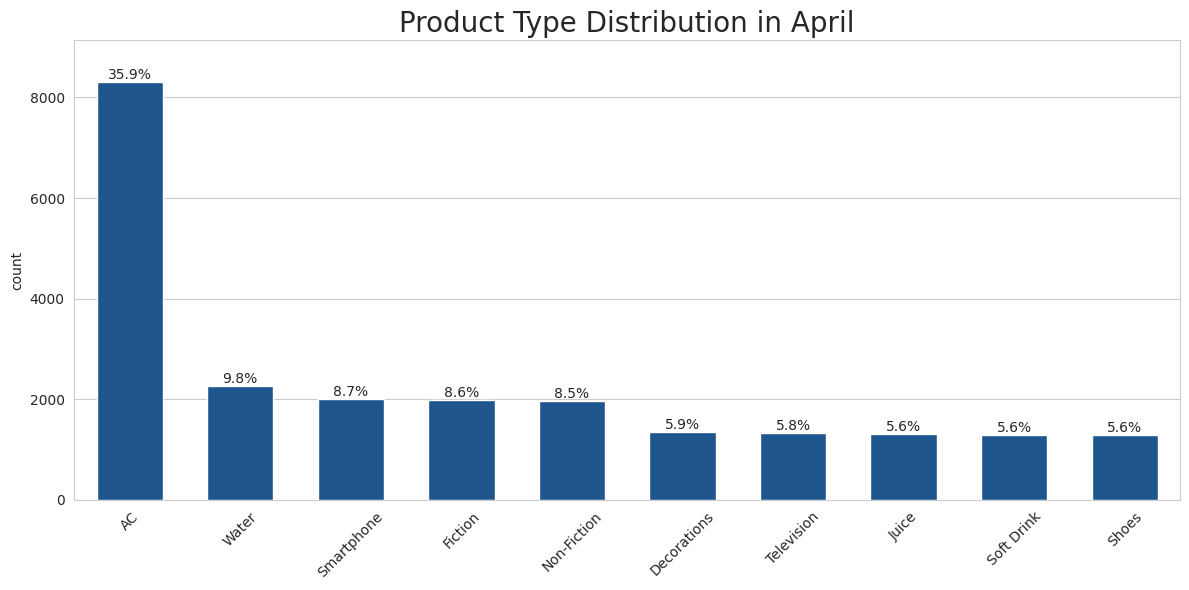

In [66]:
brand_type_by_month('April')

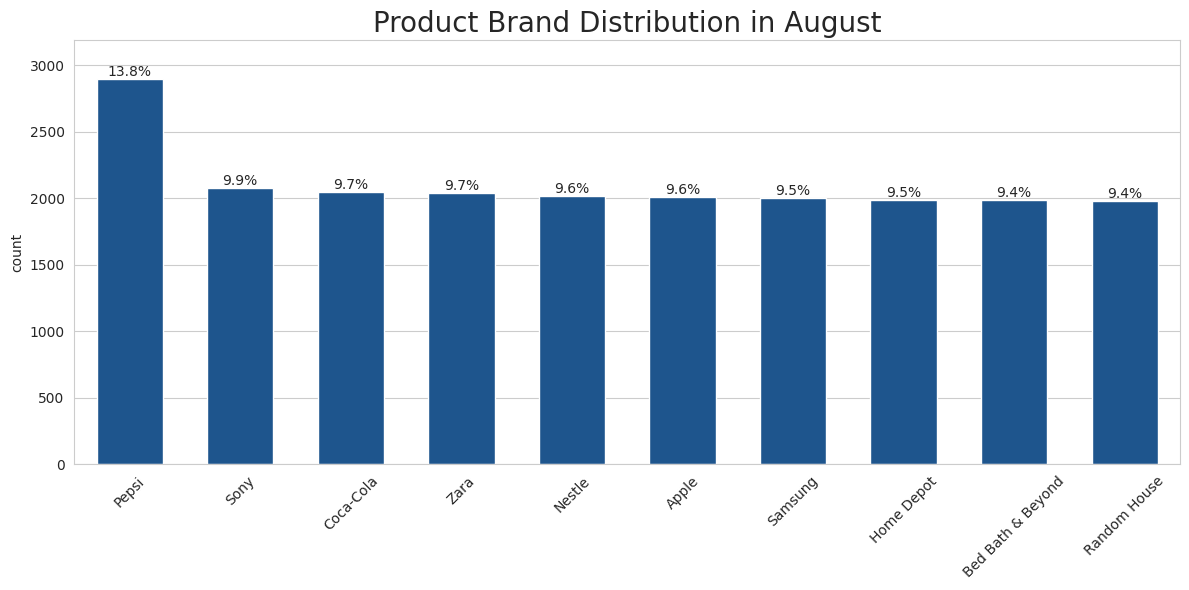

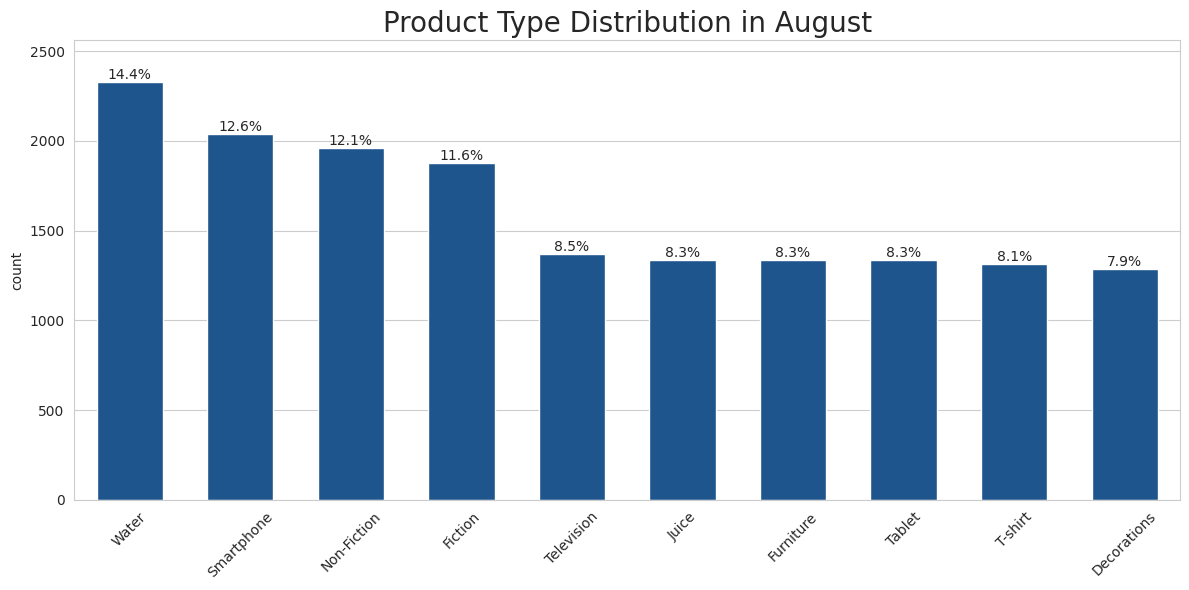

In [67]:
brand_type_by_month('August')

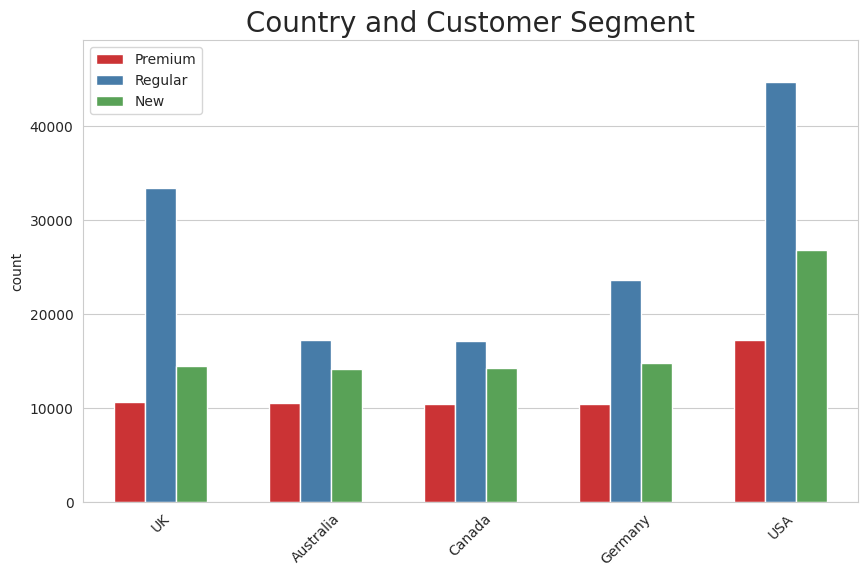

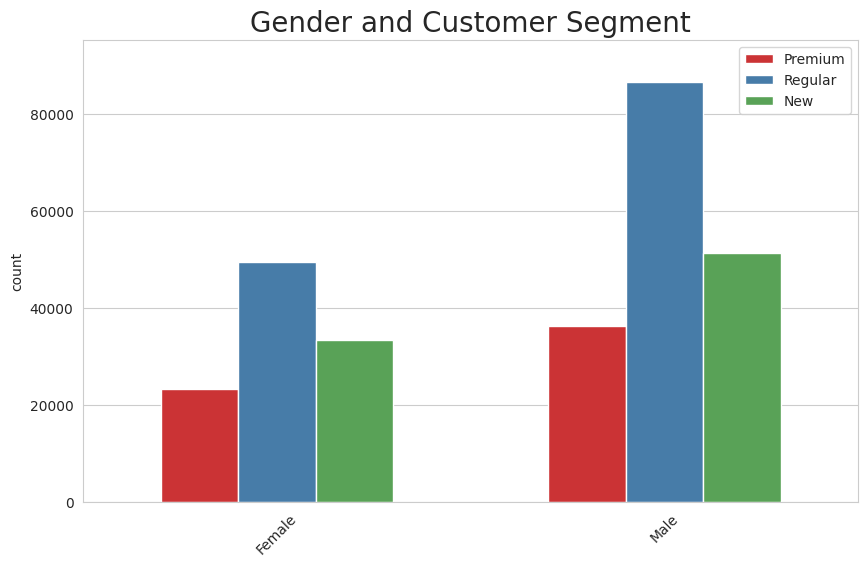

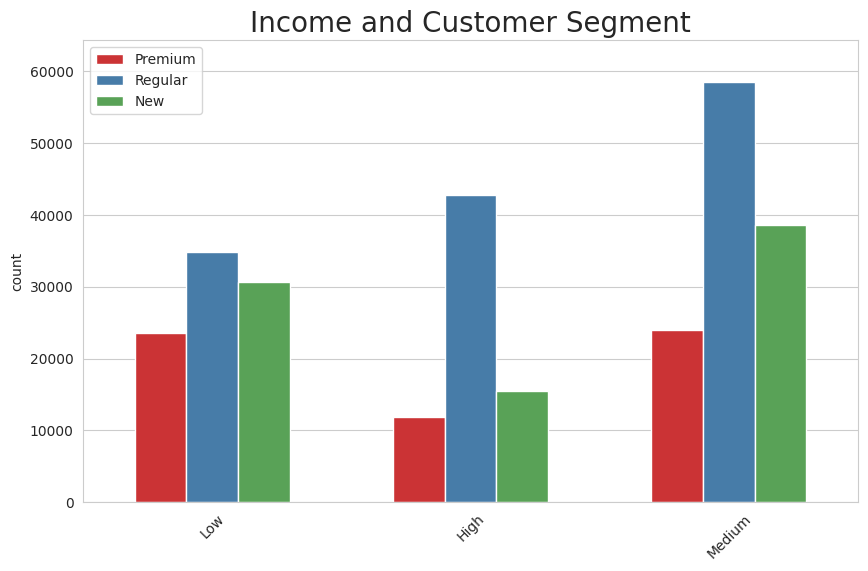

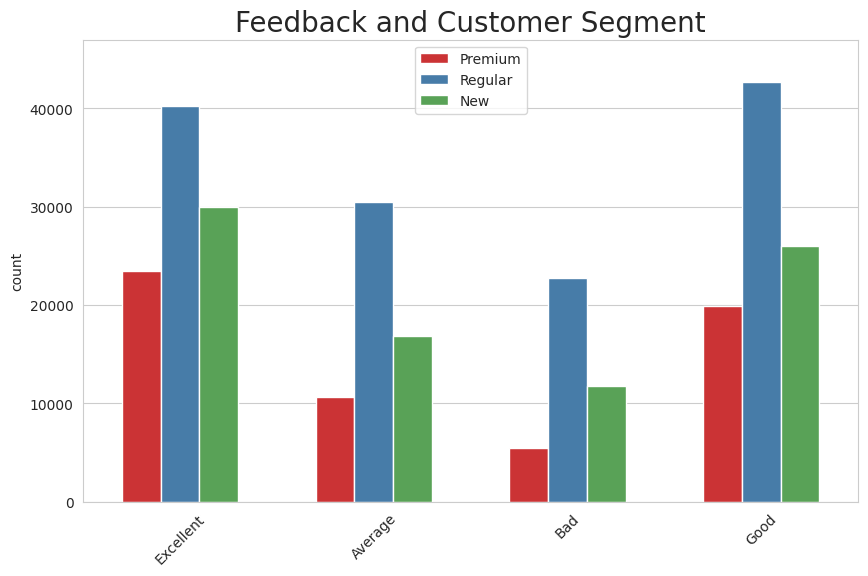

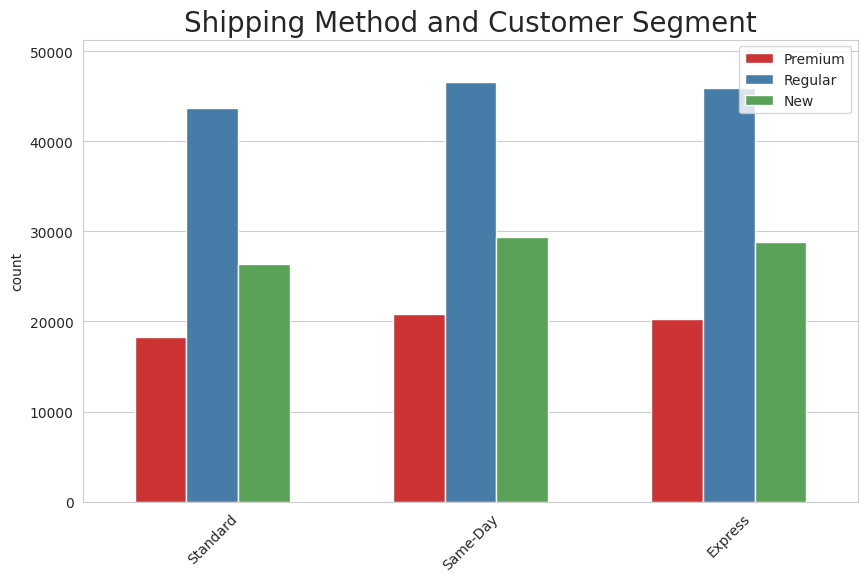

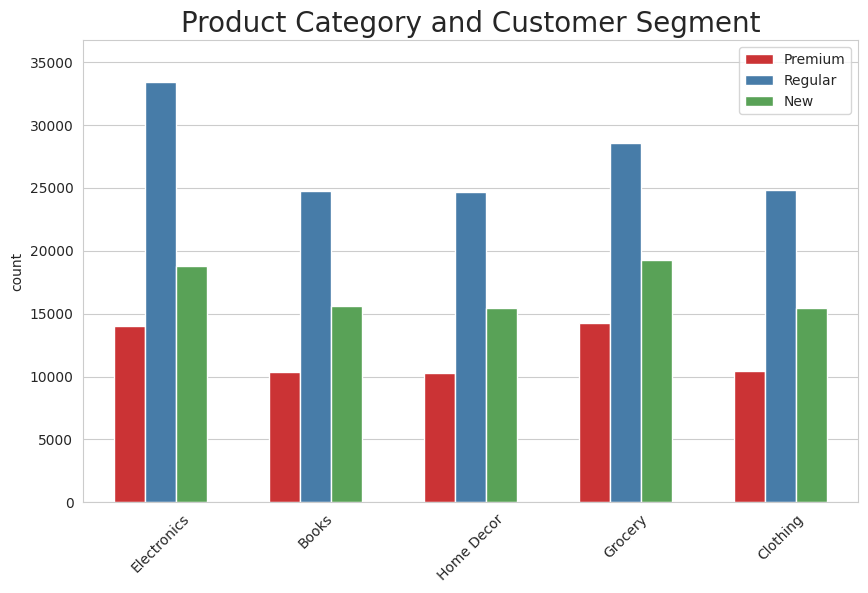

In [71]:
'''
Customer segment against come other categorical values. Looking for patterns

Most Premium and Regular orders are in USA

Premium Customers tend to give better ratings

In shipping method it is basically the same


'''
cat_cols = ['Country', 'Gender', 'Income', 'Feedback', 'Shipping_Method', 'Product_Category']
sns.set_palette('Set1')

for col in cat_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=col, hue='Customer_Segment', width=0.6)
    plt.title(f'{col.replace("_", " ")} and Customer Segment', fontsize=20)
    plt.xticks(rotation=45)
    plt.xlabel('')

    handles, labels = ax.get_legend_handles_labels()
    new_labels = [label.replace('_', ' ') for label in labels]
    ax.legend(handles, new_labels)

    # Increase y-axis limit by 10%
    max_height = max([p.get_height() for p in ax.patches])
    ax.set_ylim(0, max_height * 1.1)

    plt.show()

In [73]:
# Setting one more time the palette
sns.set_palette('Blues_r')

In [74]:
'''
Function that takes a Product Category and provides a plot of top 10 Product Brands and Types by Category
'''
def top_10_product_type_by_category(category):
    cols_to_see = ['Product_Brand','Product_Type']
    filtered_df = df[df['Product_Category'].isin([category])]
    for col in cols_to_see:
        # Get the top 10 most frequent values
        top_10_values = filtered_df[col].value_counts().nlargest(10).index
        top_10_df = filtered_df[filtered_df[col].isin(top_10_values)]

        plt.figure(figsize=(12,6))
        ax = sns.countplot(data=top_10_df, x=col, width=0.6, order=top_10_df[col].value_counts().index)
        plt.xticks(rotation=45)

        # Calculate percentages
        total = len(top_10_df[col])
        max_height = max([p.get_height() for p in ax.patches])
        ax.set_ylim(0, max_height * 1.1)  # Increase y-axis limit by 10%

        for p in ax.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')

        plt.title(f'{col.replace("_", " ")} Distribution in {category}',fontsize=20)
        plt.xlabel('')
        plt.tight_layout()
        plt.show()

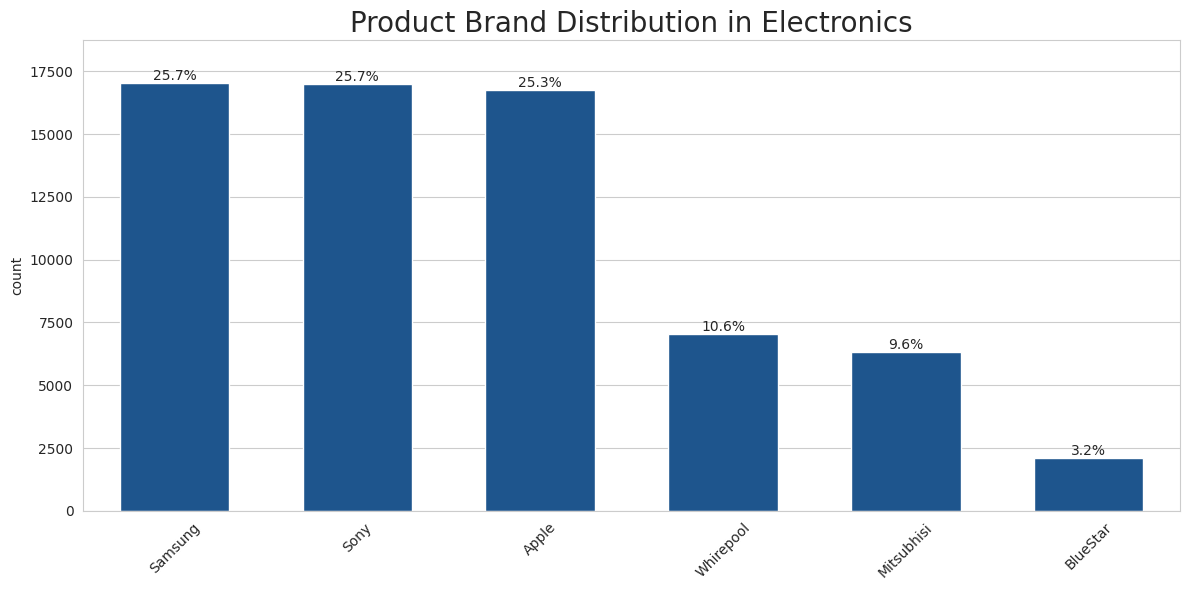

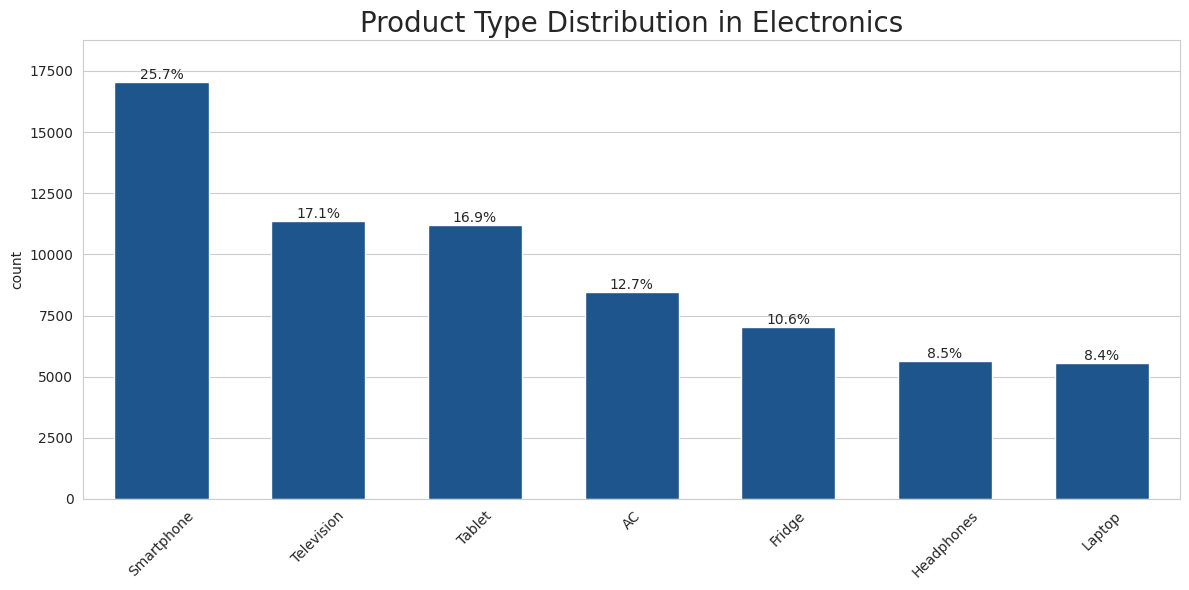

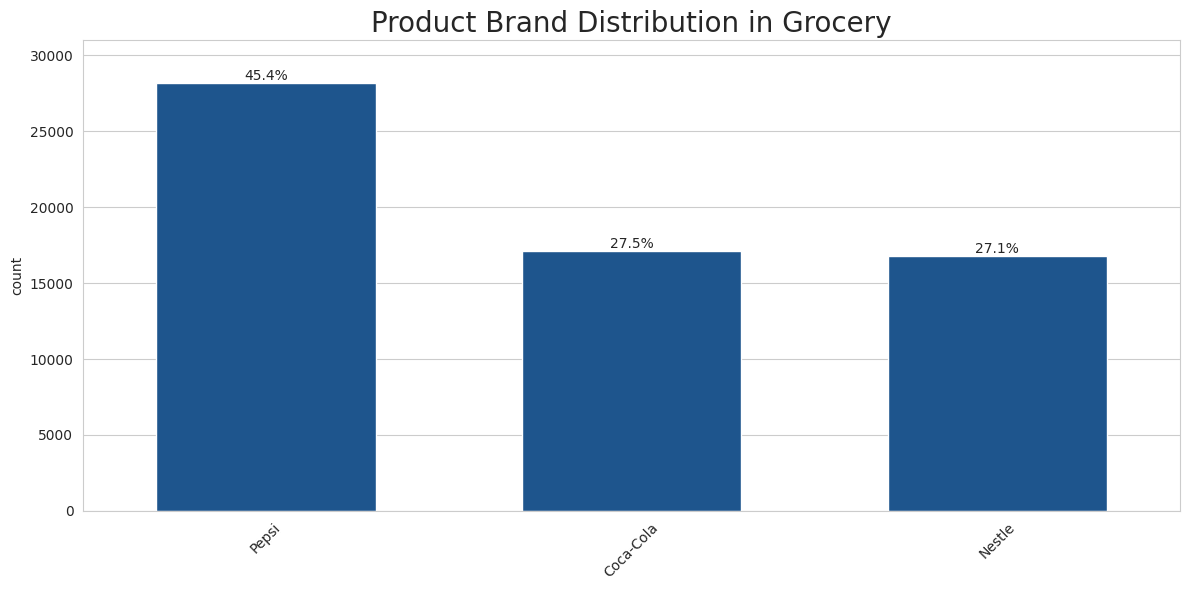

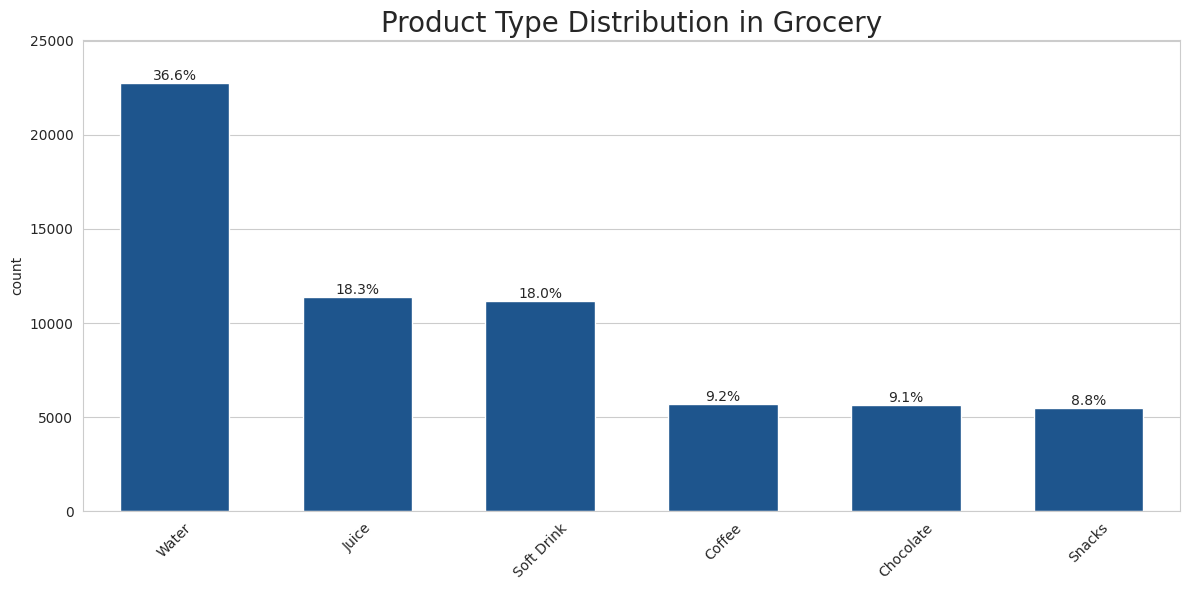

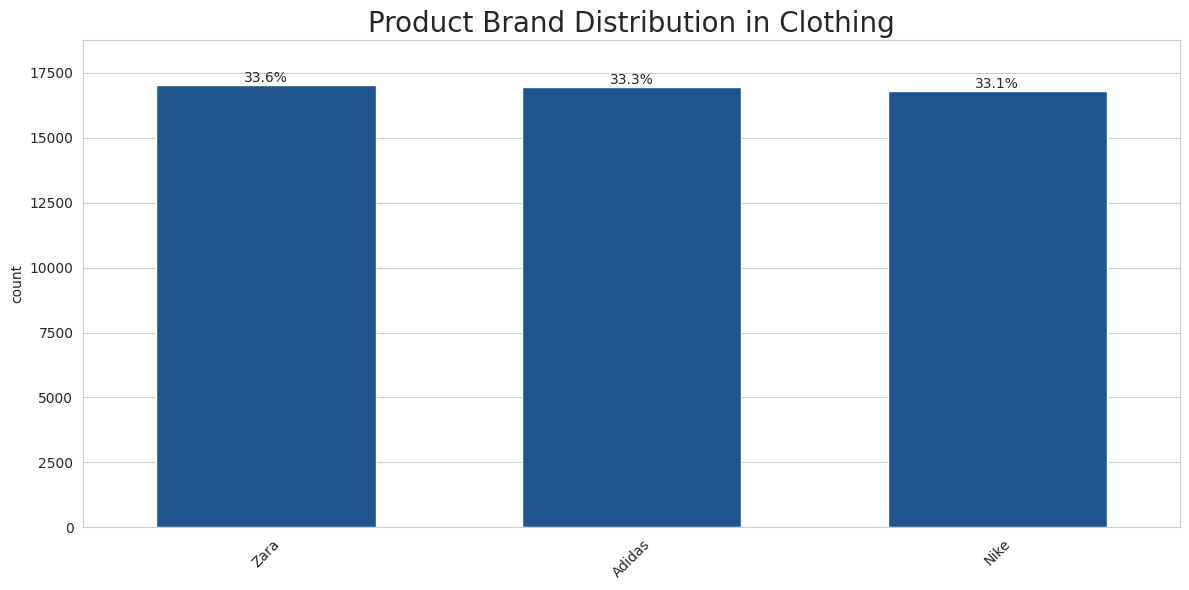

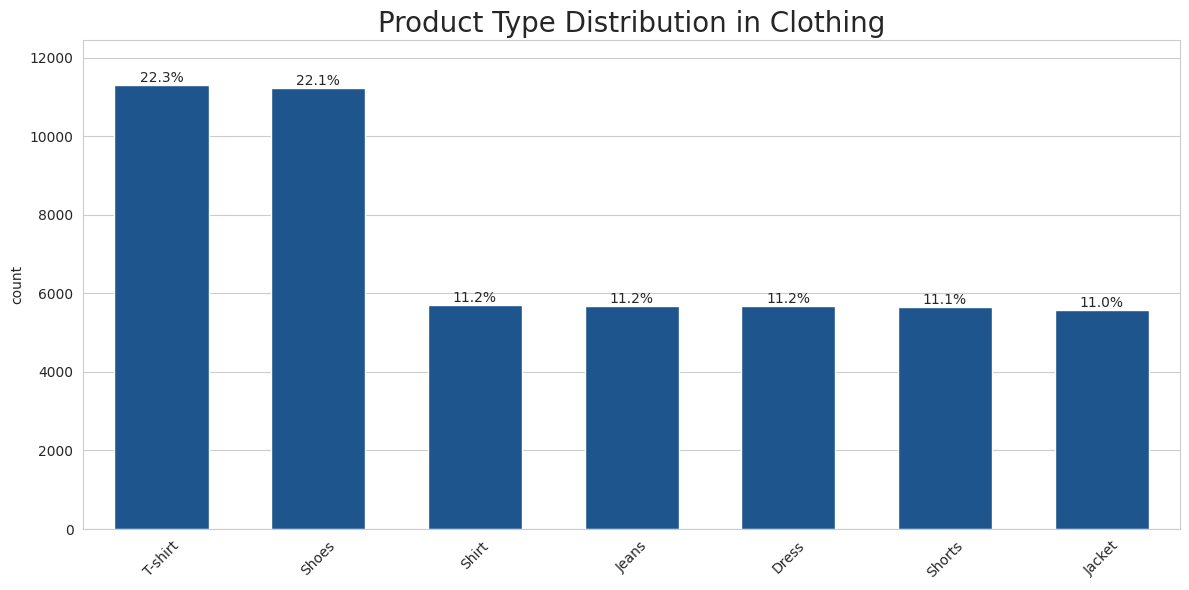

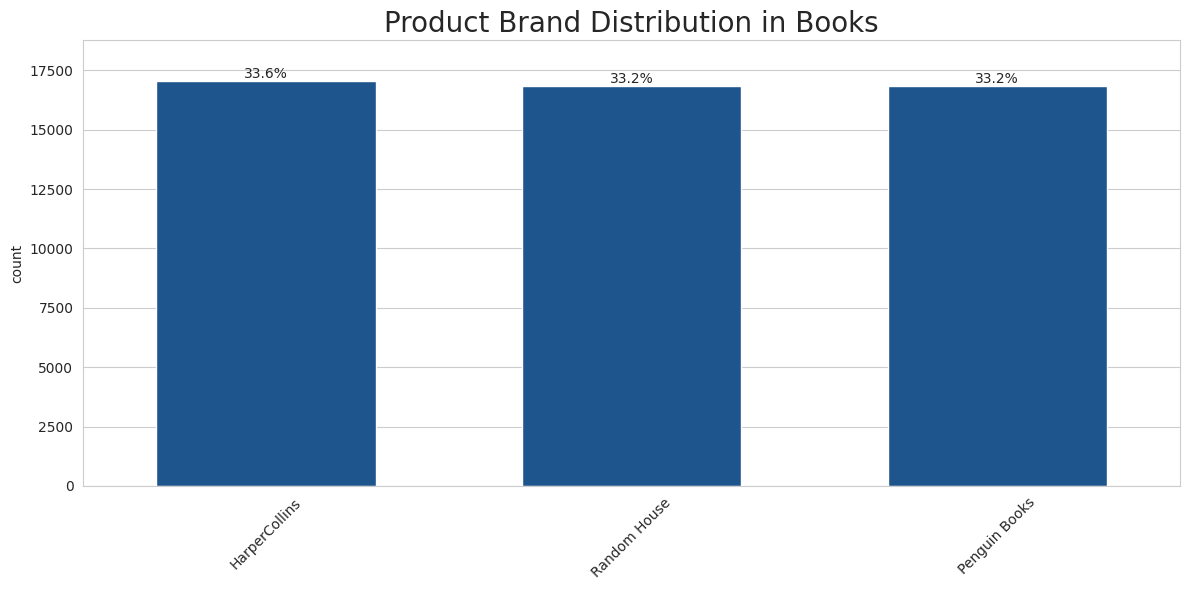

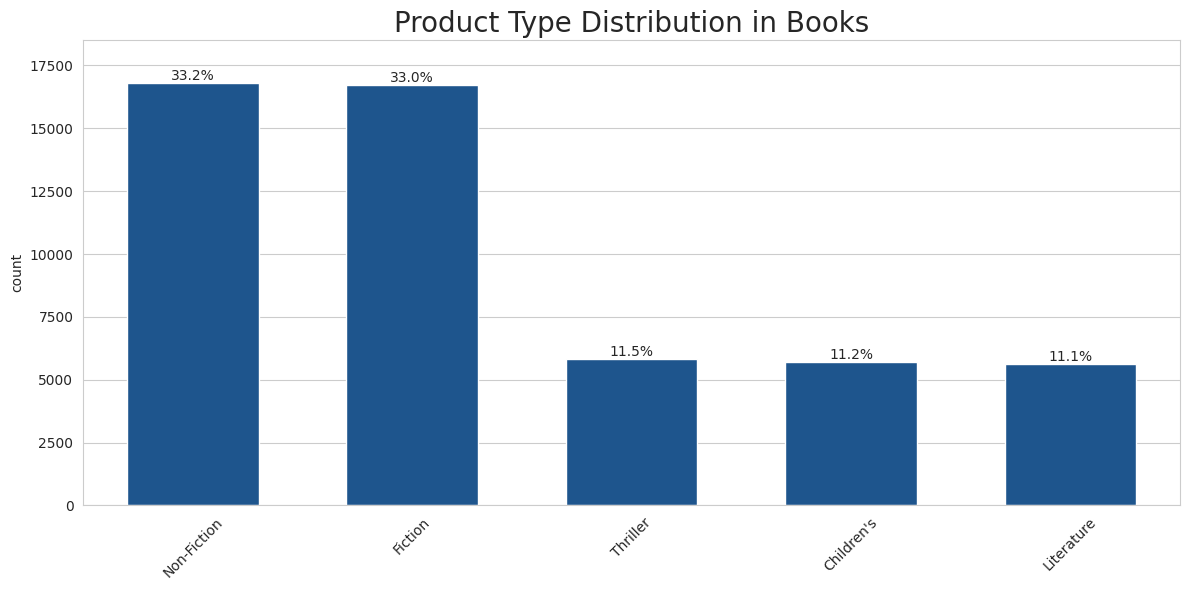

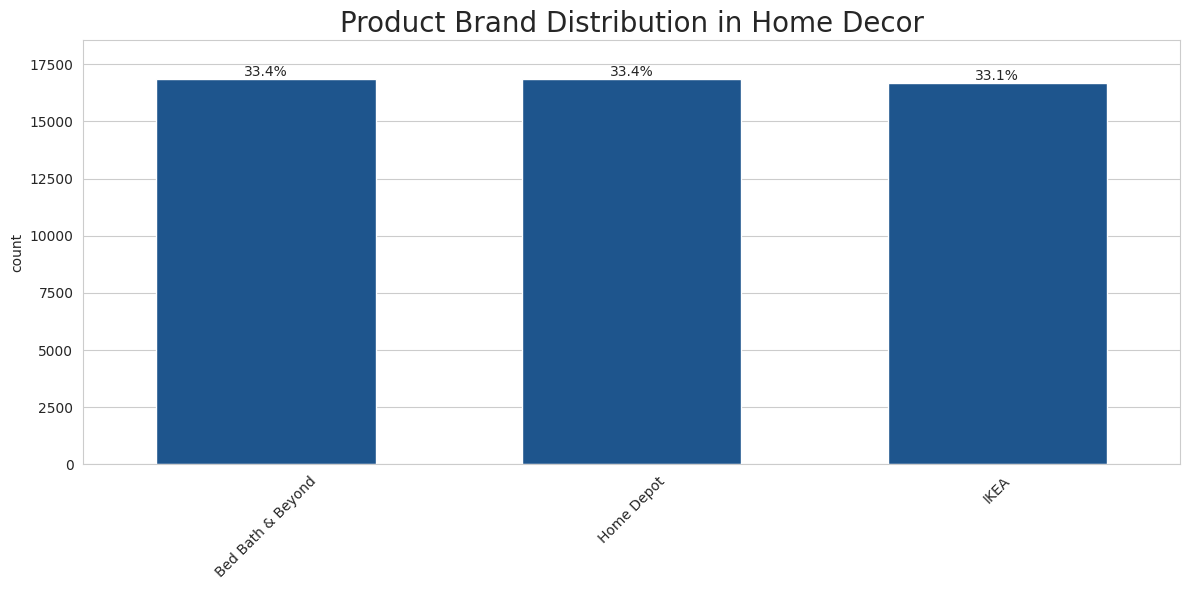

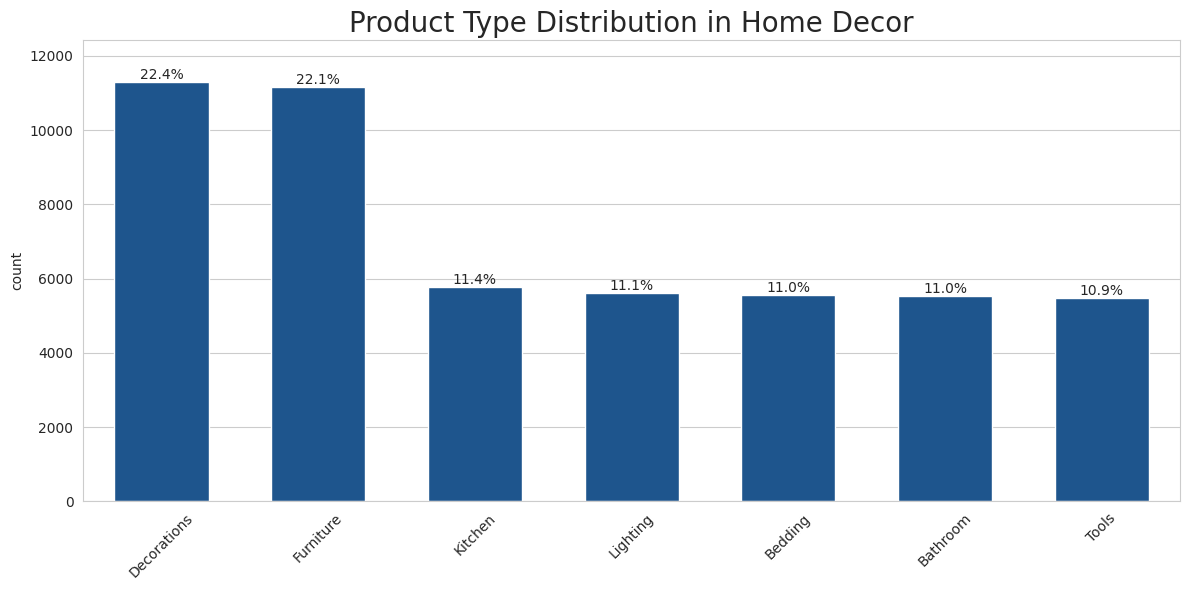

In [75]:
category = ['Electronics','Grocery','Clothing','Books','Home Decor']
for cat in category:
  top_10_product_type_by_category(cat)


In [78]:
# Function that plots the top 10 products in each most ocurring product type by month
def plot_top_products_by_month(month):

    df_month = df[df['Month'] == month]

    # Find the top 3 'Product_Type' based on occurrence
    top_product_types = df_month['Product_Type'].value_counts().nlargest(3).index
    print(top_product_types)

    # Plot the top 10 products for each of the top 3 product types
    for product_type in top_product_types:
        plt.figure(figsize=(10, 6))
        # Filter data for the specific product type
        df_type = df_month[df_month['Product_Type'] == product_type]

        # Find the top 10 products
        top_products = df_type['products'].value_counts().nlargest(10).index

        # Filter data to include only the top 10 products
        df_top_products = df_type[df_type['products'].isin(top_products)]

        # Create a count plot
        ax = sns.countplot(data=df_top_products, x='products', order=top_products)
        plt.title(f'Top 10 Products for {product_type} - Month {month}')
        plt.xticks(rotation=45)
        plt.ylabel('Count')
        plt.xlabel('Product')

        # Annotate bars with counts
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                        textcoords='offset points')

        plt.show()


Index(['Fridge', 'Water', 'Smartphone'], dtype='object', name='Product_Type')


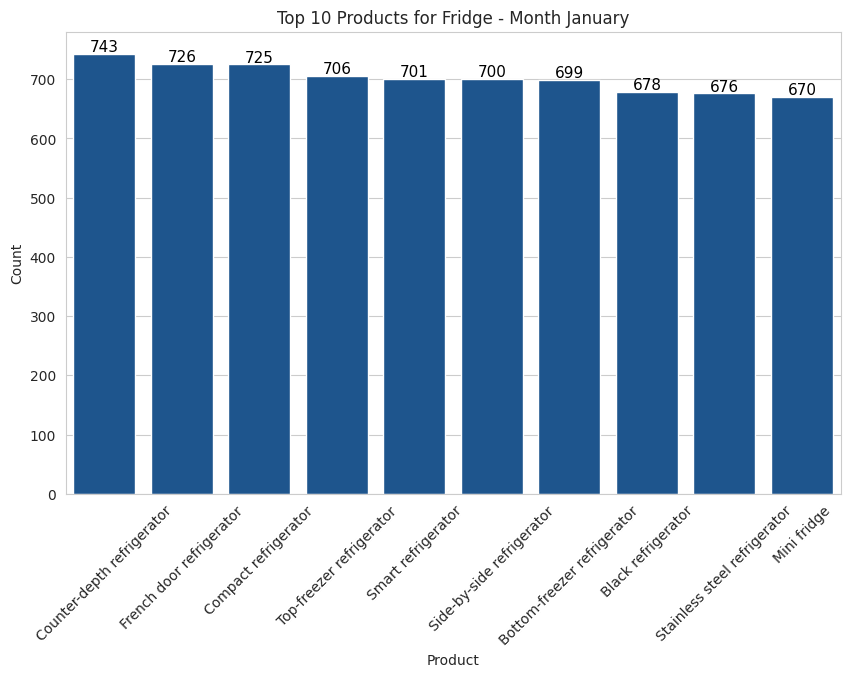

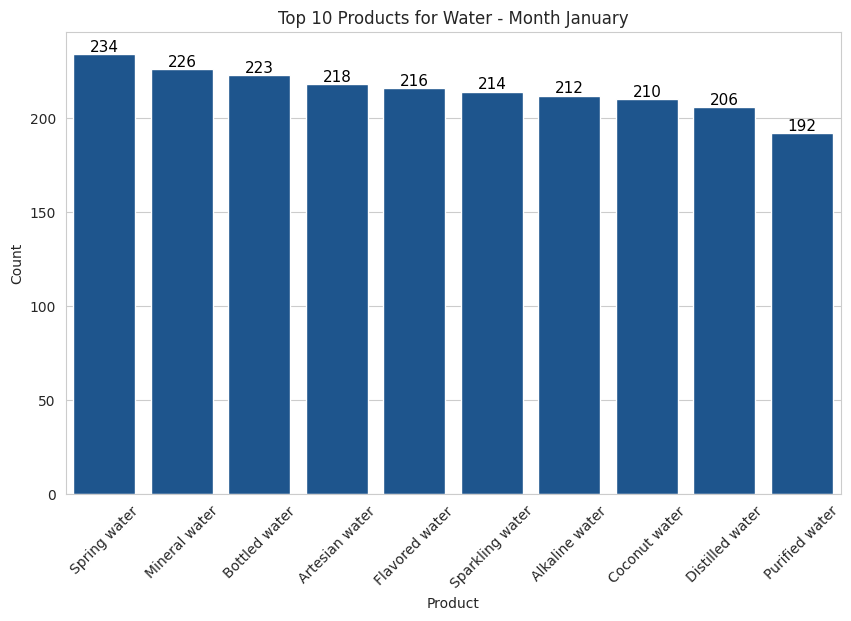

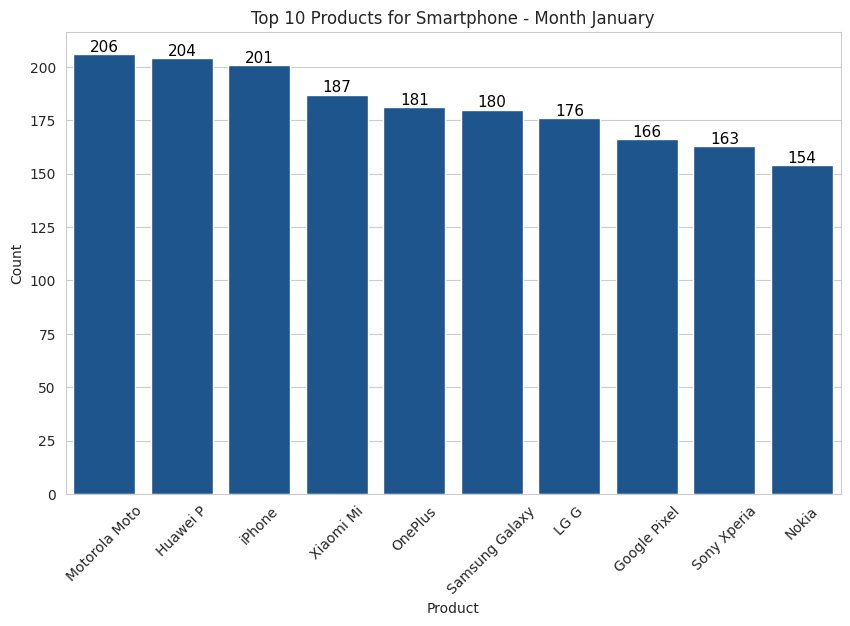

Index(['AC', 'Water', 'Smartphone'], dtype='object', name='Product_Type')


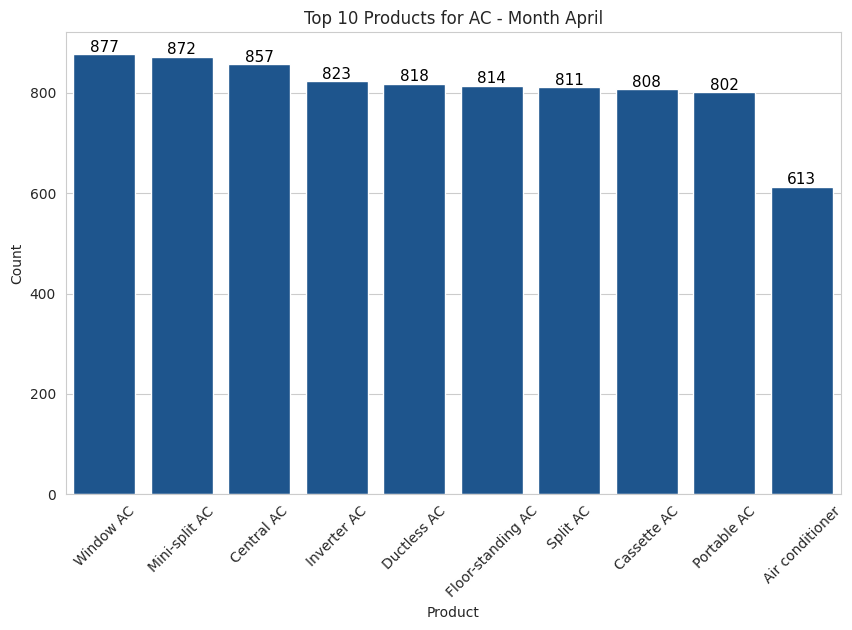

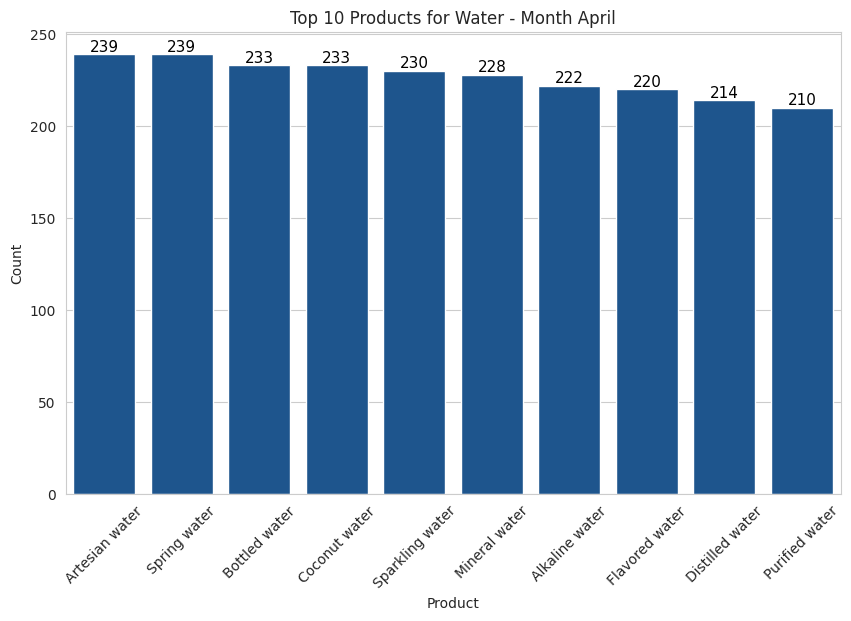

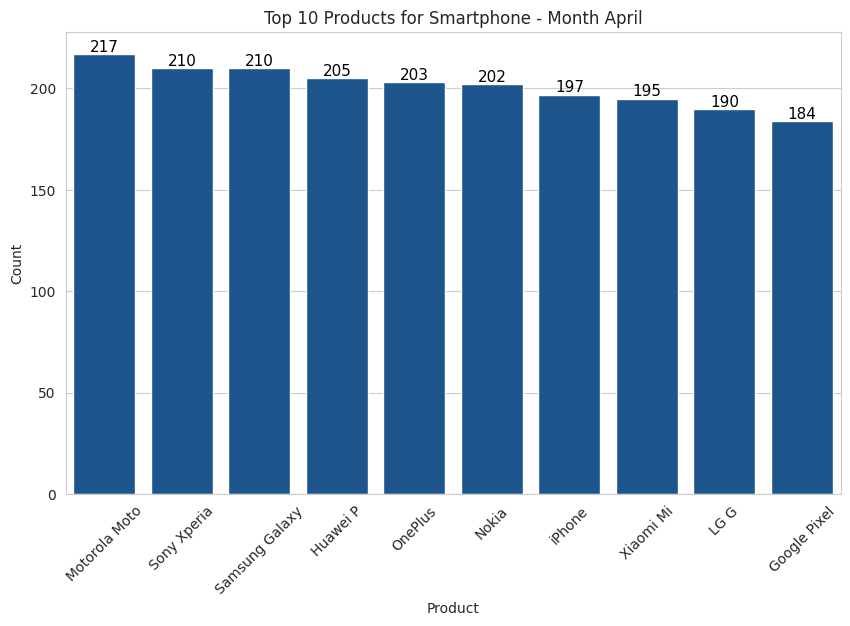

Index(['Water', 'Smartphone', 'Non-Fiction'], dtype='object', name='Product_Type')


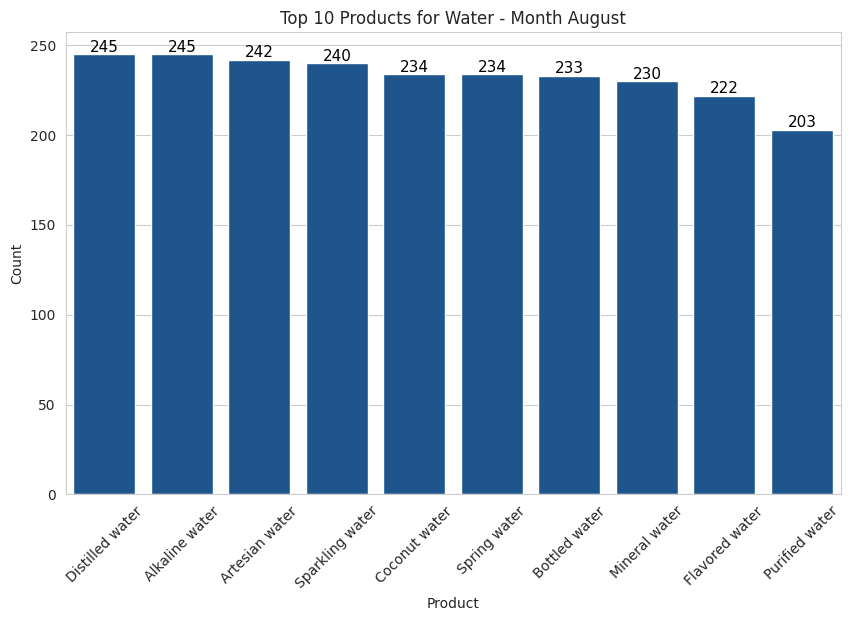

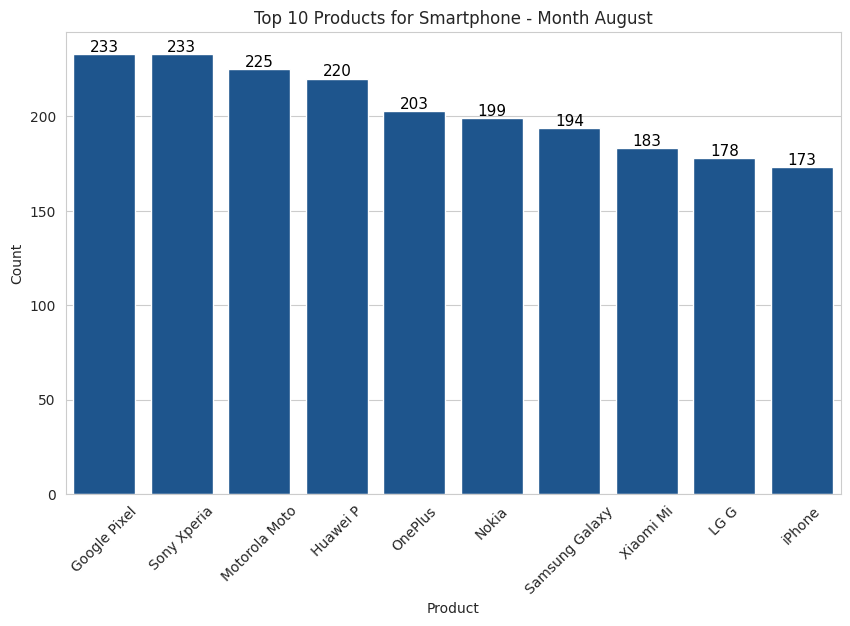

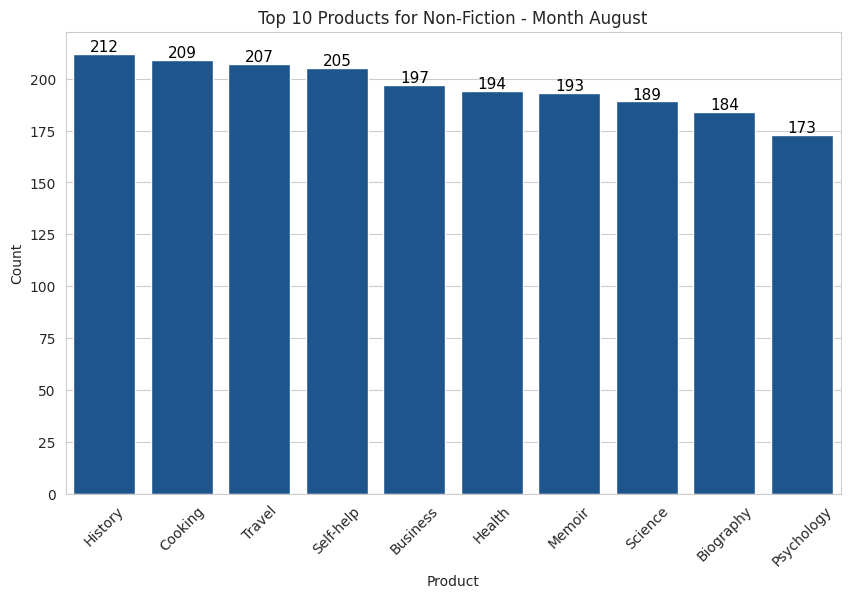

In [79]:
best_months = ['January', 'April', 'August']
for month in best_months:
  plot_top_products_by_month(month)